# 3 Vector-Based Methods for Similarity Search
- TF-IDF    (Sparse)
- BM25      (Sparse)
- SBERT     (Dense)

## TF-IDF

In [1]:
a = "purple is the best city in the forest".split()
b = "there is am art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()
d = "green should have smelled more tranquil but somehow it just tasted rotten".split()
e = "joyce enjoyed eating pancakes with ketchup".split()
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been cancelled".split()
# g is very similar to b.
g = "to get your way you must not bombard the road with yellow fruit".split()

In [2]:
def get_tf(query: str, document: str):
    # Frequency of query in our document.
    f1 = document.count(query)
    # Total number of terms in the document.
    f2 = len(document)

    # The term frequency.
    tf = f1/f2
    return(tf)
    


In [3]:
from math import log10, inf

def check_for_query(query: str, document: str):
    return(query in document)

def get_idf(query: str, documents: list):
    # IDF: inverse document frequency.
    
    # Number of documents.
    n = len(documents)

    # Number of documents containing the query.
    cnt = 0
    for document in documents:
        if(check_for_query(query, document)):
            cnt += 1
    
    # IDF.
    try:
        idf = log10(n/cnt)
        return(idf)
    except ZeroDivisionError as e:
        print("None of the documents contain this query!!!", e)
        return(inf)

In [4]:
def tf_idf(query: str, documents: list, idx: int):
    # idx is the index of the document for which TF is calculated.
    try:
        tf = get_tf(query, documents[idx])
        idf = get_idf(query, documents)
        return (tf*idf)
    except IndexError as e:
        print("Index out of bounds", e)
        return(-1)

In [5]:
print(tf_idf("is", [a, b, c], 0))
print(tf_idf("is", [a, b, c], 1))
print(tf_idf("is", [a, b, c], 2))

print(get_idf("forest", [a, b, c]))

print(tf_idf("forest", [a, b, c], 0))
print(tf_idf("forest", [a, b, c], 1))
print(tf_idf("forest", [a, b, c], 2))

0.0
0.0
0.0
0.47712125471966244
0.059640156839957804
0.0
0.0


In [6]:
# Using numpy.
import numpy as np

docs = [a, b, c]

def tfidf(word: str, sentence: list):
    freq = sentence.count(word)
    # Term frequency
    tf = freq / len(sentence)
    # Inverse document frequency
    idf = np.log10(len(docs)/sum([1 for doc in docs if word in doc]))

    return(round(tf*idf, 4))


In [7]:
print(tfidf("is", docs[0]))
print(tfidf("is", docs[1]))
print(tfidf("is", docs[2]))

print(tfidf("forest", docs[0]))
print(tfidf("forest", docs[1]))
print(tfidf("forest", docs[2]))

0.0
0.0
0.0
0.0596
0.0
0.0


In [8]:
# Converting TF-IDF to a vector.
vocab = set(a + b + c)
vocab

{'am',
 'and',
 'art',
 'bananas',
 'best',
 'city',
 'find',
 'forest',
 'getting',
 'in',
 'is',
 'it',
 'not',
 'often',
 'on',
 'purple',
 'soggy',
 'street',
 'the',
 'there',
 'throwing',
 'to',
 'way',
 'you',
 'your'}

In [9]:
# Calculate, for every word, the TF-IDF for every document.
vec_a = []
vec_b = []
vec_c = []

for word in vocab:
    vec_a.append(tfidf(word, a))
    vec_b.append(tfidf(word, b))
    vec_c.append(tfidf(word, c))


In [10]:
vec_a

[0.0,
 0.0,
 0.0596,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0596,
 0.0596,
 0.0,
 0.0,
 0.0596,
 0.0,
 0.0,
 0.0596,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [11]:
vec_b

[0.0265,
 0.0,
 0.0,
 0.0265,
 0.0265,
 0.0265,
 0.0265,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0098,
 0.0,
 0.0098,
 0.0,
 0.0,
 0.0265,
 0.0098,
 0.0265,
 0.0098,
 0.0098,
 0.0,
 0.0265,
 0.053,
 0.0]

In [12]:
vec_c

[0.0,
 0.0434,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0434,
 0.0,
 0.0,
 0.0,
 0.016,
 0.0,
 0.016,
 0.0434,
 0.0,
 0.0,
 0.016,
 0.0,
 0.016,
 0.016,
 0.0434,
 0.0,
 0.0,
 0.0]

## BM25

Optimized version of TF-IDF. In TF-IDF, as the frequency of the query in the document increases, the score increases linearly. This is not an accurate gauge of relevance.

In [13]:
docs = [a, b, c, d, e, f]

In [14]:
N = len(docs)
avg_doc_len = sum(len(sentence) for sentence in docs) / N

def bm25(word: str, sentence: str, k=1.2, b=0.75):
    freq = sentence.count(word) # f(q, D)
    # Term Frequency
    tf = (freq * (k + 1)) / (freq + k*(1 - b + b*len(sentence)/avg_doc_len))
    
    # Number of documents that contain word
    N_q = sum([1 for doc in docs if word in doc])

    # Inverse Document Frequency
    idf = np.log(1 + (N - N_q + 0.5) / (N_q + 0.5))

    return(round(tf*idf, 4))

In [15]:
bm25("purple", b)

0.0

In [16]:
bm25("purple", a)

1.7677

In [17]:
a1 = "this car is purple and it runs fast"
a2 = "i like purple, my favorite is purple"

print("tfidf a1: ", tfidf("purple", a1))
print("tfidf a2: ", tfidf("purple", a2))
print("bm25 a1: ", bm25("purple", a1))
print("bm25 a2: ", bm25("purple", a2))

tfidf a1:  0.0222
tfidf a2:  0.0432
bm25 a1:  0.8472
bm25 a2:  1.335


## SBERT

In [18]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [19]:
docs = [a, b, c, d, e, f, g]
sentence_embeddings = model.encode(docs)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarities and store in a list.
scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))
for i in range(sentence_embeddings.shape[0]):
    scores[i, :] = cosine_similarity([sentence_embeddings[i]], sentence_embeddings)[0]

In [21]:
scores

array([[0.99999988, 0.7334435 , 0.73750222, 0.68846285, 0.57291883,
        0.71828824, 0.71877611],
       [0.7334435 , 1.        , 0.96404165, 0.74360418, 0.67559481,
        0.91467702, 0.95032322],
       [0.73750222, 0.96404165, 1.        , 0.73878711, 0.66657013,
        0.96022242, 0.92937332],
       [0.68846285, 0.74360418, 0.73878711, 0.99999982, 0.57304776,
        0.69360393, 0.72075301],
       [0.57291883, 0.67559481, 0.66657013, 0.57304776, 1.00000012,
        0.67700011, 0.67161906],
       [0.71828824, 0.91467702, 0.96022242, 0.69360399, 0.67700011,
        1.00000012, 0.91012239],
       [0.71877611, 0.95032322, 0.92937326, 0.72075289, 0.67161906,
        0.91012233, 1.00000024]])

<Axes: >

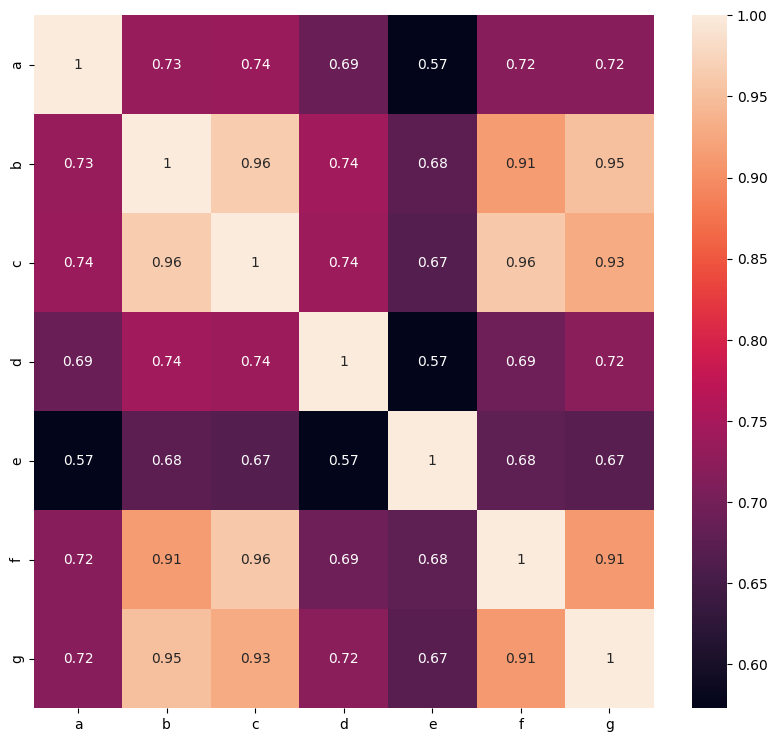

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 9))
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
sns.heatmap(scores, xticklabels=labels, yticklabels=labels, annot=True)

These scores tell us how 'similar' two sentences are.